<a href="https://colab.research.google.com/github/ShreyaNayak04/MaskWhiz/blob/main/facemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
#Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from the kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data  test.jpg


Importing the libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_file=os.listdir('/content/data/with_mask')
print(with_mask_file[0:7])
print(with_mask_file[-5:])


['with_mask_1385.jpg', 'with_mask_3238.jpg', 'with_mask_384.jpg', 'with_mask_1669.jpg', 'with_mask_2061.jpg', 'with_mask_1978.jpg', 'with_mask_1622.jpg']
['with_mask_315.jpg', 'with_mask_2312.jpg', 'with_mask_2751.jpg', 'with_mask_3657.jpg', 'with_mask_2324.jpg']


In [ ]:
without_mask_file=os.listdir('/content/data/without_mask')
print(without_mask_file[0:8])

['without_mask_1533.jpg', 'without_mask_474.jpg', 'without_mask_712.jpg', 'without_mask_1115.jpg', 'without_mask_1723.jpg', 'without_mask_835.jpg', 'without_mask_3462.jpg', 'without_mask_2972.jpg']


In [ ]:
print('Number of person with mask : ',len(with_mask_file))
print('Number of person without mask : ',len(without_mask_file))

Number of person with mask :  3725
Number of person without mask :  3828


**Create a lables for two class of images**

with mask = 1
without mask = 0

In [ ]:
#creating a list
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828


In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:10])
print(labels[-10:])

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Displaying the images**

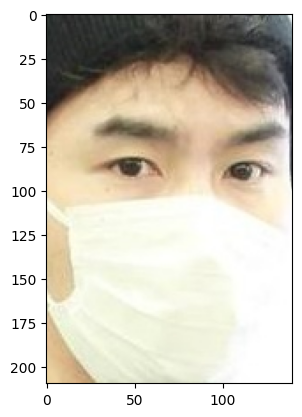

In [ ]:
# displaying mask images
img =mpimg.imread('/content/data/with_mask/with_mask_315.jpg')
imgplot = plt.imshow(img)
plt.show()

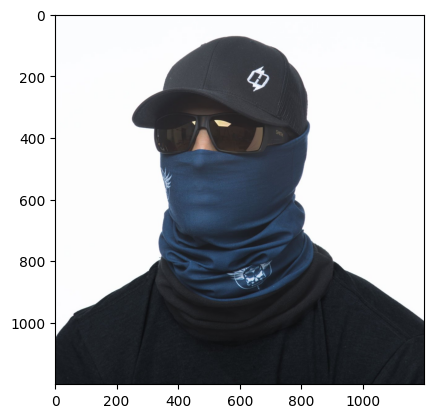

In [ ]:
img =mpimg.imread('/content/data/with_mask/with_mask_3238.jpg')
imgplot = plt.imshow(img)
plt.show()

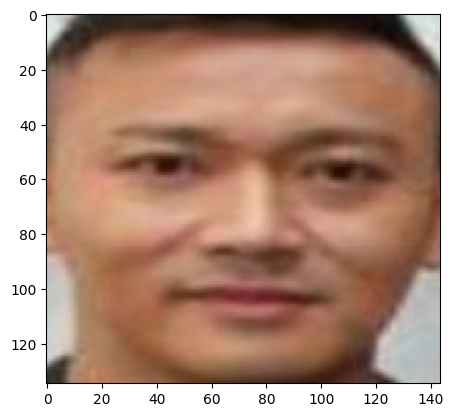

In [ ]:
#without mask
img =mpimg.imread('/content/data/without_mask/without_mask_474.jpg')
imgplot = plt.imshow(img)
plt.show()

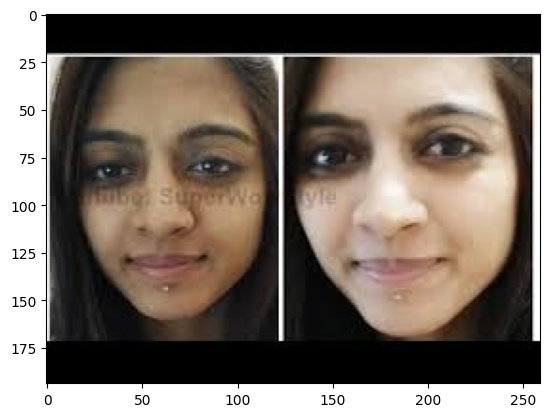

In [ ]:
img =mpimg.imread('/content/data/without_mask/without_mask_1723.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

In [ ]:
# Resize the images
# Convert the images to numpy arrays
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_file:
  image=Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

#for without mask

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_file:
  image=Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(len(data))
print(type(data))

7553
<class 'list'>


In [ ]:
data[0]

array([[[165, 151, 154],
        [116, 104, 108],
        [ 94,  86,  91],
        ...,
        [ 61,  47,  47],
        [ 50,  38,  40],
        [ 42,  31,  34]],

       [[ 97,  86,  86],
        [ 73,  63,  64],
        [ 72,  67,  69],
        ...,
        [ 92,  74,  74],
        [ 77,  61,  61],
        [ 61,  47,  48]],

       [[ 83,  75,  73],
        [ 81,  75,  73],
        [ 61,  59,  58],
        ...,
        [109,  86,  86],
        [101,  81,  79],
        [ 97,  77,  74]],

       ...,

       [[ 18,  12,  21],
        [ 18,  14,  25],
        [ 19,  16,  27],
        ...,
        [  2,  24,  71],
        [  1,  24,  70],
        [  1,  24,  68]],

       [[ 22,  13,  21],
        [ 19,  11,  19],
        [ 18,  14,  22],
        ...,
        [  2,  24,  70],
        [  2,  25,  69],
        [  1,  23,  71]],

       [[ 25,  12,  19],
        [ 22,  11,  17],
        [ 19,  12,  20],
        ...,
        [  2,  25,  69],
        [  3,  26,  70],
        [  3,  25,  72]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting the labels and data to numpy array

x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

In [ ]:
print(x.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# Scaling the data
# previously the values are between 0 - 255
# after scaling the values are between 0 - 1
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[185, 188, 193],
        [185, 188, 193],
        [186, 189, 194],
        ...,
        [189, 192, 197],
        [189, 192, 197],
        [189, 192, 197]],

       [[186, 189, 194],
        [186, 189, 194],
        [186, 189, 194],
        ...,
        [190, 193, 198],
        [190, 193, 198],
        [190, 193, 198]],

       [[187, 190, 195],
        [187, 190, 195],
        [187, 190, 195],
        ...,
        [191, 194, 199],
        [191, 194, 199],
        [191, 194, 199]],

       ...,

       [[167, 124,  89],
        [156, 118,  88],
        [144, 116,  94],
        ...,
        [161, 141, 117],
        [192, 172, 148],
        [190, 170, 146]],

       [[166, 132, 104],
        [156, 125, 100],
        [145, 120, 100],
        ...,
        [161, 142, 118],
        [186, 166, 143],
        [184, 164, 140]],

       [[150, 132, 112],
        [148, 128, 109],
        [141, 119, 101],
        ...,
        [164, 146, 124],
        [183, 162, 141],
        [184, 164, 141]]

In [ ]:
X_train_scaled[0]

array([[[0.7254902 , 0.7372549 , 0.75686275],
        [0.7254902 , 0.7372549 , 0.75686275],
        [0.72941176, 0.74117647, 0.76078431],
        ...,
        [0.74117647, 0.75294118, 0.77254902],
        [0.74117647, 0.75294118, 0.77254902],
        [0.74117647, 0.75294118, 0.77254902]],

       [[0.72941176, 0.74117647, 0.76078431],
        [0.72941176, 0.74117647, 0.76078431],
        [0.72941176, 0.74117647, 0.76078431],
        ...,
        [0.74509804, 0.75686275, 0.77647059],
        [0.74509804, 0.75686275, 0.77647059],
        [0.74509804, 0.75686275, 0.77647059]],

       [[0.73333333, 0.74509804, 0.76470588],
        [0.73333333, 0.74509804, 0.76470588],
        [0.73333333, 0.74509804, 0.76470588],
        ...,
        [0.74901961, 0.76078431, 0.78039216],
        [0.74901961, 0.76078431, 0.78039216],
        [0.74901961, 0.76078431, 0.78039216]],

       ...,

       [[0.65490196, 0.48627451, 0.34901961],
        [0.61176471, 0.4627451 , 0.34509804],
        [0.56470588, 0

**Building a Convolutional Neural Network**

In [ ]:
# tensorflow is used to build the CNN
# keras requires tensorflow in the backend
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation= 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation= 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

#sigmoid for binary classification
model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [ ]:
# Compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Training the neural network
history = model.fit(X_train_scaled,Y_train, validation_split=0.1, epochs=5 )

Epoch 1/5
170/170 [==============================] - 15s 21ms/step - loss: 0.5092 - acc: 0.7874 - val_loss: 0.3032 - val_acc: 0.8843
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2900 - acc: 0.8878 - val_loss: 0.2274 - val_acc: 0.9124
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2437 - acc: 0.9031 - val_loss: 0.2123 - val_acc: 0.9140
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2061 - acc: 0.9150 - val_loss: 0.2100 - val_acc: 0.9190
Epoch 5/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1706 - acc: 0.9369 - val_loss: 0.2387 - val_acc: 0.9074


In [ ]:
# Model evaluation
loss, accuracy  = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy = ",accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2160 - acc: 0.9140
Test Accuracy =  0.9139642715454102


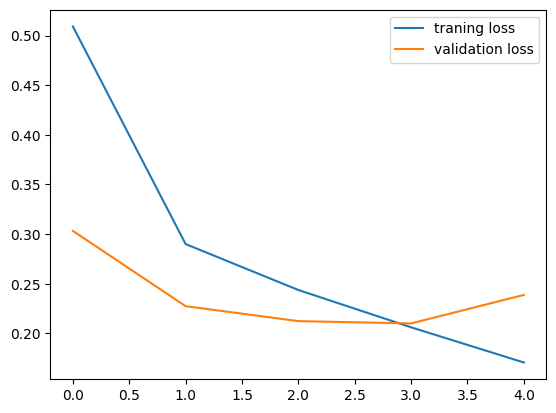

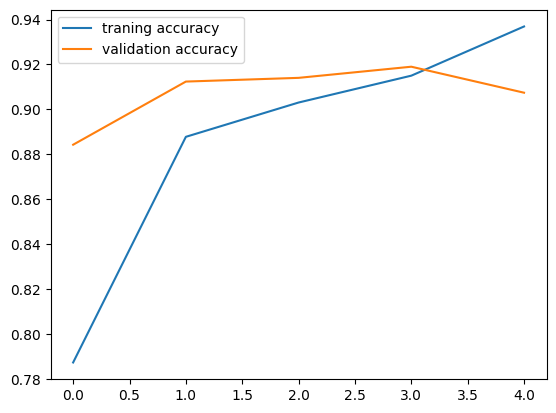

In [ ]:
h =history

#plotting the loss value
plt.plot(h.history['loss'],label='traning loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#Accuracy value
plt.plot(h.history['acc'],label='traning accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Prediction**

Path of the image to be predicted: /content/mask_with.jpg


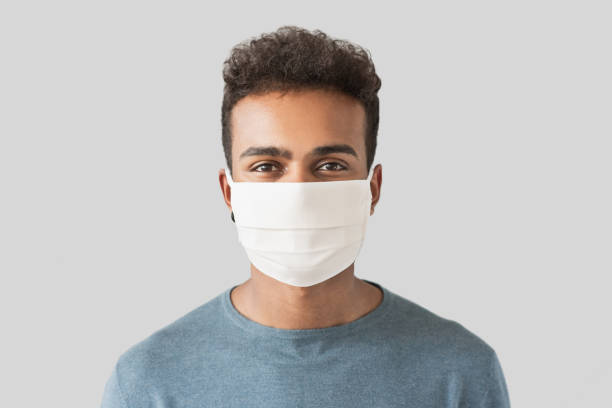

1/1 [==============================] - 0s 23ms/step
[[0.46123722 0.59286666]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/with_mask1.jpeg


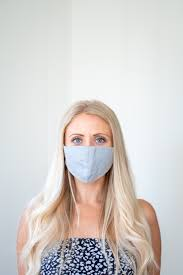

1/1 [==============================] - 0s 21ms/step
[[0.42419323 0.6817328 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/no_mask.jpg


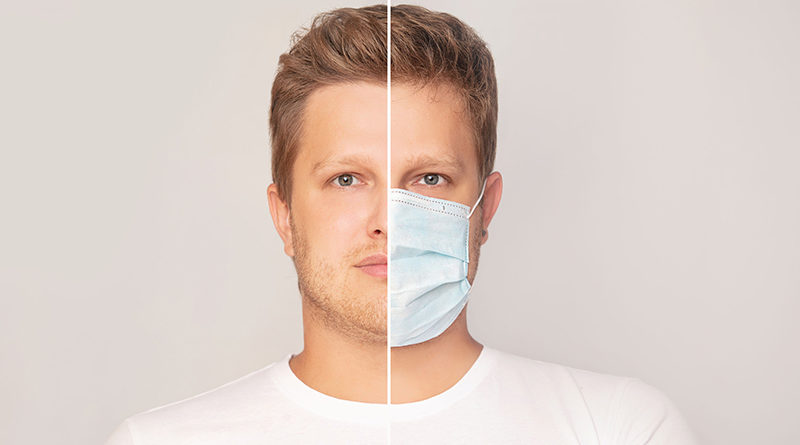

1/1 [==============================] - 0s 29ms/step
[[0.52615374 0.49928612]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


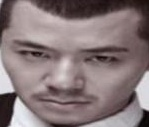

1/1 [==============================] - 0s 19ms/step
[[0.54993176 0.47516173]]
0
The person in the image is not wearing a mask


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
